## Classification



  Construire un modèle qui classe les tumeurs comme malignes ou
bénines avec le [jeu de données sur le cancer du sein](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) qui est
[disponible avec scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). un fichier *csv* est aussi fourni.



### Prétraitement



#### Valeurs manquantes



Charger le jeu de données et gérer les données manquantes s'il y en a.



In [6]:
import sklearn.datasets

Si l'on est juste intéressé par les données 'brutes' pour la classification, on peut utiliser l'argument `return_X_y` pour ne récupérer que celles-ci :

In [7]:
X,y = sklearn.datasets.load_breast_cancer(return_X_y=True);

### Régression logistique



Entrainer un modèle par régression logistique sur les données et afficher la matrice de confusion.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()
lr.fit(X, y)

/home/bernard/miniconda3/envs/lps/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

En laissant la valeur par défaut de l'argument `max_iter`, l'algorithme de calcul des paramètres optimaux de la régression logistique ne converge pas, on va donc augmenter celui-ci. Il n'est pas génant de mettre une grande valeur car c'est le nombre *maximum* d'itérations et l'algorithme s'arrêtera avant s'il peut converger (c'est-à-dire calculer des paramètres satisfaisant) :

In [11]:
lr= LogisticRegression(max_iter= 10000)
lr.fit(X, y)

LogisticRegression(max_iter=10000)

In [14]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y, lr.predict(X))
print(conf_mat)

[[197  15]
 [  9 348]]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Pour donner des noms aux classes, il faut connaître ceux-ci :

In [68]:
sklearn.datasets.load_breast_cancer().target_names

array(['malignant', 'benign'], dtype='<U9')

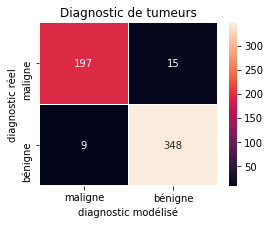

In [18]:
plt.figure(figsize=(4,3))
target_labels=["maligne","bénigne"]
sns.heatmap(conf_mat,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs");

Séparer `X` (variables explicatives) et `y` (variable cible) wn
`X_train, X_test` et `y_train`, `y_test`. Entrainer un modèle de
régression logistique sur les données `train` et afficher la matrice
de confusion sur les données `test`.



On utilise un jeu de test de 25%, ce qui est particulièrement grand, pour les raisons suivantes :
  - les classes sont déséquilibrées, donc un échantillon aura proportionnellement peu de tumeurs malignes
  - le jeu de données n'est pas gros, donc un faible pourcentage correspond à un faible nombre de données
  - la classification n'est pas extrêmement difficile, donc le nombre de faux positifs et faux négatifs sera assez faible
  
Pour ces raisons, si l'on avoir suffisamment de faux négatifs pour comparer les différents modèles, il faut un jeu de tests assez conséquent.

[[56  8]
 [ 1 78]]


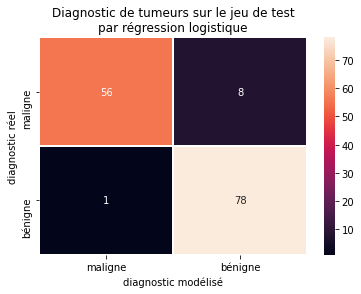

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25)
lr_train= LogisticRegression(max_iter= 10000)
lr_train.fit(X_train, y_train)
conf_mat_test = confusion_matrix(y_test, lr_train.predict(X_test))
print(conf_mat_test)
sns.heatmap(conf_mat_test,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar régression logistique");

### Arbre de décision



#### Paramètres



Entrainer un arbre de décision sur les données d'apprentissage et
afficher la matrice de confusion sur les données de test.



In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

[[55  9]
 [ 4 75]]


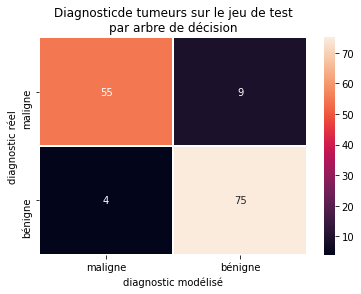

In [31]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
conf_mat_decision_tree = confusion_matrix(y_test, decision_tree.predict(X_test))
print(conf_mat_decision_tree)
sns.heatmap(conf_mat_decision_tree,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar arbre de décision");

#### Hyperparamètres



En utilisant [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), optimiser les hyperparamètres d'un arbre de
décision par validation croisée. Afficher la matrice de
confusion pour le jeu de données de test.



Comme hyperparamètre, on va optimiser la taille maximale de l'arbre de décision. On va essayer toutes les tailles maximales entre 1 et 34 :

In [32]:
from sklearn.model_selection import GridSearchCV
n_fold = 15
max_depths= range(1,35)
grid_search_decision_tree = GridSearchCV(
    estimator= DecisionTreeClassifier(),
    param_grid={'max_depth': max_depths},
    scoring='precision',
    cv=n_fold,
    refit=True,
    verbose=True
, n_jobs=-1)# autant de tâches en parallèle que possible (que de coeurs)
grid_search_decision_tree.fit(X_train, y_train)

Fitting 15 folds for each of 34 candidates, totalling 510 fits


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 35)}, scoring='precision',
             verbose=True)

[[57  7]
 [ 5 74]]


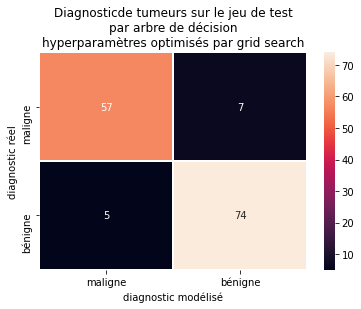

In [33]:
conf_mat_grid_search_decision_tree = confusion_matrix(y_test, grid_search_decision_tree.predict(X_test))
print(conf_mat_grid_search_decision_tree)
sns.heatmap(conf_mat_grid_search_decision_tree,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar arbre de décision\nhyperparamètres optimisés par grid search");

### K plus proches voisins



#### Paramètres



Entrainer un modèle de *K plus proches voisins* sur les données
d'apprentissage et afficher la matrice de confusion sur les données de
test.



In [37]:
from sklearn.neighbors import KNeighborsClassifier

[[53 11]
 [ 1 78]]


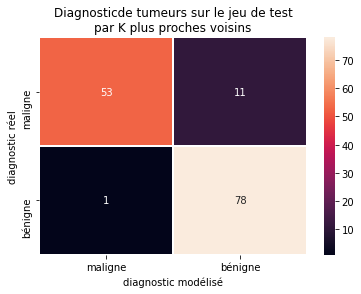

In [38]:
knn = KNeighborsClassifier().fit(X_train, y_train)
conf_mat_knn = confusion_matrix(y_test, knn.predict(X_test))
print(conf_mat_knn)
sns.heatmap(conf_mat_knn,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar K plus proches voisins");

#### Hyperparamètres



En utilisant [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), optimiser les hyperparamètres d'un modèle
de plus proches voisins par validation croisée. Afficher la matrice de
confusion sur les données de test.



On va optimiser les hyperparamètres `n_neighbors` et `weights` :

In [41]:
grid_search_knn = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid={'n_neighbors': range(1,10),
               'weights': ('uniform','distance')},
    scoring='precision',
    cv=n_fold,
    refit=True,
    verbose=True
, n_jobs=-1)# autant de tâches en parallèle que possible (que de coeurs)
grid_search_knn.fit(X_train, y_train)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ('uniform', 'distance')},
             scoring='precision', verbose=True)

[[56  8]
 [ 2 77]]


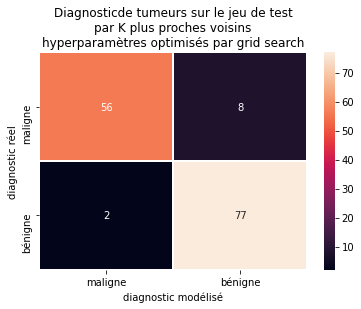

In [42]:
conf_mat_grid_search_knn = confusion_matrix(y_test, grid_search_knn.predict(X_test))
print(conf_mat_grid_search_knn)
sns.heatmap(conf_mat_grid_search_knn,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar K plus proches voisins\nhyperparamètres optimisés par grid search");

#### Normalisation



Normaliser les variables explicatives



En fait, la classification par plus proches voisins étant basée sur une distance multi-dimensionnelle (dans l'espace des variables explicatives), les variables ayant une faible amplitude seront moins prises en compte que celles ayant une grande amplitude. Si une variable varie entre 0 et 1 et une autre varie entre 0 et 100, la première aura moins d'influence que la seconde. Pour corriger cela, on va faire un prétraitement pour normaliser les variables. Les paramètres de la normalisation seront calculés seulement sur le jeu d'apprentissage, mais on devra évidemment l'appliquer aussi sur le jeu de test au moment de l'évaluation.

In [43]:
from sklearn.preprocessing import StandardScaler

Fitting 15 folds for each of 18 candidates, totalling 270 fits
[[58  6]
 [ 2 77]]


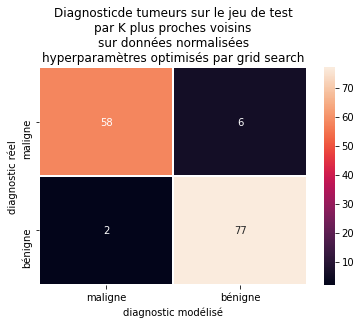

In [45]:
scaler=StandardScaler().fit(X_train)
grid_search_knn_scaled = GridSearchCV(
    estimator= KNeighborsClassifier(),
    param_grid={'n_neighbors': range(1,10),
               'weights': ('uniform','distance')},
    scoring='precision',
    cv=n_fold,
    refit=True,
    verbose=True
, n_jobs=-1)# autant de tâches en parallèle que possible (que de coeurs)
grid_search_knn_scaled.fit(scaler.transform(X_train), y_train)
conf_mat_grid_search_knn_scaled = confusion_matrix(y_test, grid_search_knn_scaled.predict(scaler.transform(X_test)))
print(conf_mat_grid_search_knn_scaled)
sns.heatmap(conf_mat_grid_search_knn_scaled,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar K plus proches voisins\nsur données normalisées\nhyperparamètres optimisés par grid search");

### Ensemble Learning



# Bagging

On va évaluer un modèle de [bagging](https://fr.wikipedia.org/wiki/Bootstrap_aggregating), la [forêt d'arbres décisionnels](https://fr.wikipedia.org/wiki/For%C3%AAt_d%27arbres_d%C3%A9cisionnels). Le nombre d'hyperparamètres et le nombre de valeurs possibles pour ceux-ci interdit une optimisation par recherche exhaustive, on utilisera donc  [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) :

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[[60  4]
 [ 0 79]]


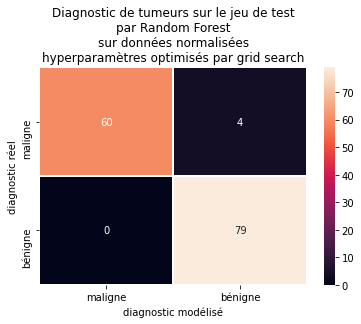

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
rf_search = GridSearchCV(
    estimator= RandomForestClassifier(),
    param_grid={'n_estimators' : n_estimators,
            'max_features' : max_features,
            'max_depth' : max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap' : bootstrap},
    scoring='precision',
    cv=n_fold,
    refit=True,
    verbose=True
, n_jobs=-1)# autant de tâches en parallèle que possible (que de coeurs)
rf_search.fit(scaler.transform(X_train), y_train)
conf_mat_rf_search = confusion_matrix(y_test,rf_search.predict(scaler.transform(X_test)))
print(conf_mat_rf_search)
sns.heatmap(conf_mat_rf_search,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar Random Forest\nsur données normalisées\nhyperparamètres optimisés par grid search");

#### Boosting



En utilisant [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), optimiser les hpyerparamètres d'un
[XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) . On peut utiliser l'espace de recherche suivant :

    param_grid = {
            'silent': [False],
            'max_depth': [6, 10, 15, 20],
            'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
            'gamma': [0, 0.25, 0.5, 1.0],
            'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
            'n_estimators': [100]}



L'optimisation des hyperparamètres commence à être assez coûteuse en temps de calculs. Malheureusement, on ne peut pas éviter de faire des [validation croisées](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e) car le jeu de données est trop petit pour l'amputer encore d'un jeu de validation important.
On fixe le nombre d'itérations et on utilise la *magic* `%%time` pour mesurer le temps écoulé

(**⚠ !** Ne pas utiliser `%%timeit` sous peine d'attendre TRÈS longtemps…)

In [66]:
n_iter=100

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/home/bernard/miniconda3/envs/lps/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:04] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:18:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[58  6]
 [ 0 79]]
CPU times: user 4.55 s, sys: 0 ns, total: 4.55 s
Wall time: 7h 37min 42s


Text(0.5, 1.0, 'Diagnostic de tumeurs sur le jeu de test\npar XGBoost\nsur données normalisées\nhyperparamètres optimisés par grid search')

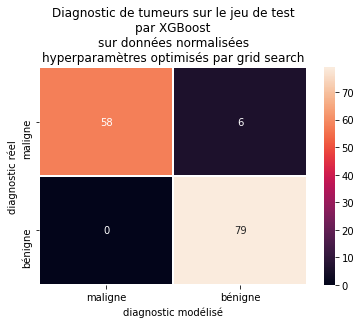

In [67]:
%%time
import xgboost as xgb

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xgb_search = RandomizedSearchCV(xgb.XGBClassifier(), param_grid, n_iter=n_iter,
                            n_jobs=-1, verbose=3, cv=n_fold,
                            scoring='precision', refit=True)
xgb_search.fit(scaler.transform(X_train), y_train)
conf_mat_xgb_search = confusion_matrix(y_test,xgb_search.predict(scaler.transform(X_test)))
print(conf_mat_xgb_search)
sns.heatmap(conf_mat_xgb_search,annot = True, linewidths=0.5,fmt=".0f",xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("diagnostic modélisé")
plt.ylabel("diagnostic réel")
plt.title("Diagnostic de tumeurs sur le jeu de test\npar XGBoost\nsur données normalisées\nhyperparamètres optimisés par grid search");

## Bonus



Quelle fonction de `scoring` utilisez-vous et pourquoi ?



On a utilisé `'precision'` en considérant que l'on voulait éviter au maximum de classer une tumeur comme bénigne alors qu'elle est en fait cancéreuse. La [précision](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel#Pr%C3%A9cision) nous permets de minimiser le nombre de faux positifs :
![img](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Precisionrappel.svg/350px-Precisionrappel.svg.png)